In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

C:\Users\AKSHTA\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\AKSHTA\Downloads\emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# Data Cleaning
# Check for missing values
data.isnull().sum()

text    0
spam    0
dtype: int64

In [4]:
# Remove any rows with missing 'text' or 'spam'
data.dropna(subset=['text', 'spam'], inplace=True)

In [5]:
data.duplicated().sum()

33

In [6]:
data = data.drop_duplicates(keep='first')

In [7]:
data.duplicated().sum()

0

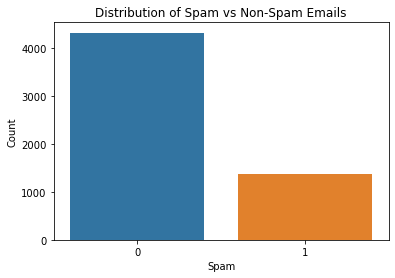

In [8]:
# Exploratory Data Analysis (EDA)
# Visualizing the distribution of spam and non-spam emails
sns.countplot(x='spam', data=data)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()

In [9]:
# Text Processing
# Splitting the dataset into training and testing sets
X = data['text']
y = data['spam']

In [10]:
# Encoding the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
# Creating a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [12]:
# Text Vectorization
# Using TfidfVectorizer to convert text data into numerical vectors
vectorizer = TfidfVectorizer()

In [13]:
# Transform the training and testing data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [14]:
# Model Training - Using RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)  # Initializing Random Forest Classifier
classifier.fit(X_train_vectorized, y_train)  # Train the model

RandomForestClassifier(random_state=42)

In [15]:
# Model Evaluation
# Making predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

In [16]:
# Generating the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

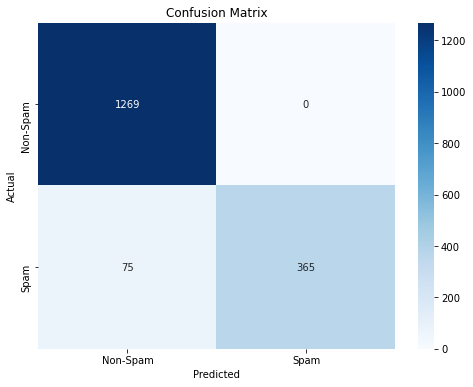

In [17]:
# Visualizing the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Print the classification report
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1269
           1       1.00      0.83      0.91       440

    accuracy                           0.96      1709
   macro avg       0.97      0.91      0.94      1709
weighted avg       0.96      0.96      0.95      1709

